In [51]:
from scipy import io
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans

# Loading Data

In [2]:
all_dat=io.loadmat('/media/maria/DATA1/Documents/old_docs/Amygdala/data_Fustinana_etal_2021.mat')
dat_mouse1=all_dat['data'][0][0][2][0][0][0][0][0][0]
motion_mouse1=all_dat['data'][0][0][2][0][0][0][0][0][2]

In [8]:
averaged_motion_mouse1=np.mean(motion_mouse1[1:].reshape(-1, 4,2), axis=1)

In [9]:
print(dat_mouse1.shape)
print(motion_mouse1.shape)
print(averaged_motion_mouse1.shape)

(13804, 90)
(55217, 2)
(13804, 2)


In [4]:
13804*4

55216

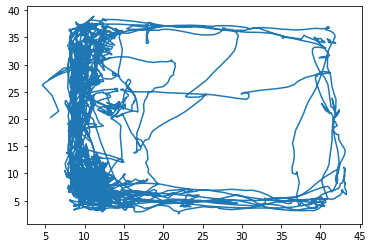

In [11]:
plt.plot(averaged_motion_mouse1[:,0],averaged_motion_mouse1[:,1])

# Neuron activations in area

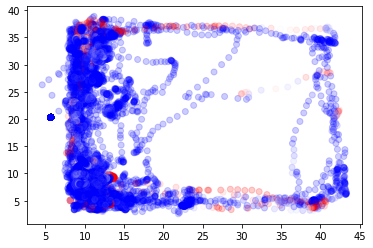

In [30]:
#Neuron 0 colormap
arr_color = cm.bwr(dat_mouse1[:,0])
arr_color[:,3]=0.2
plt.scatter(averaged_motion_mouse1[:,0],averaged_motion_mouse1[:,1],c=arr_color)

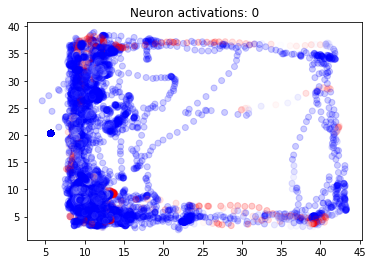

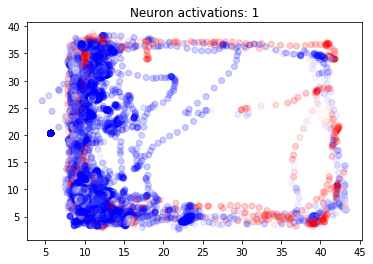

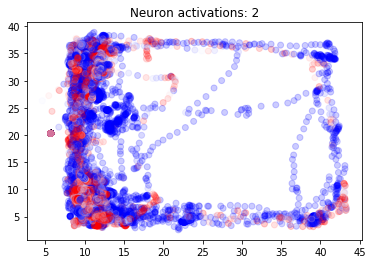

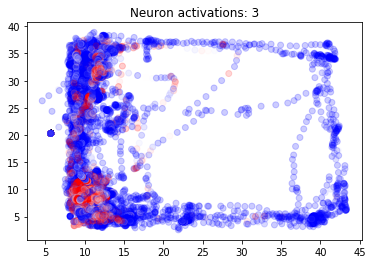

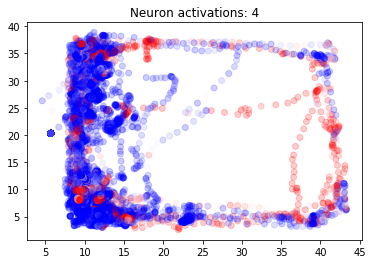

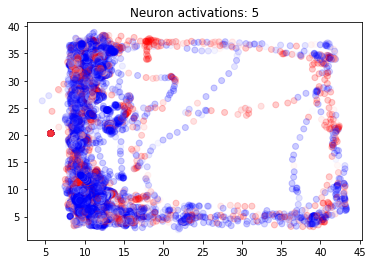

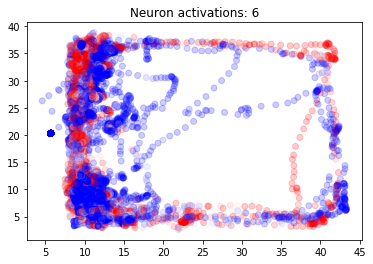

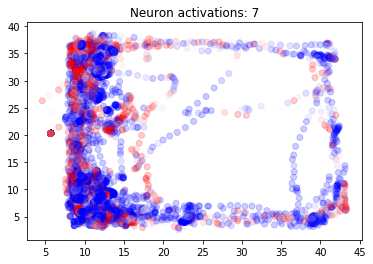

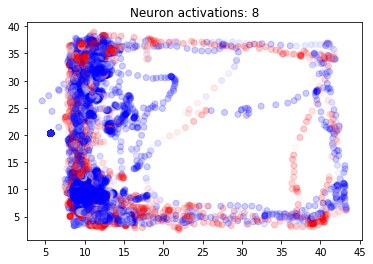

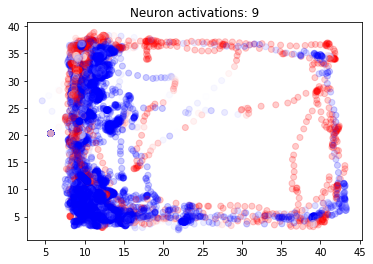

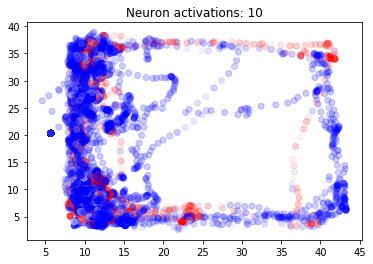

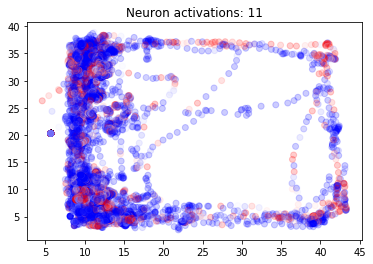

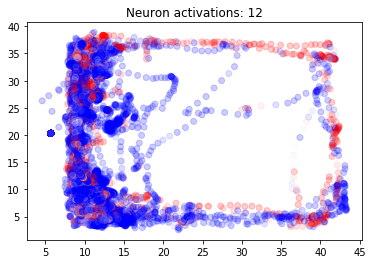

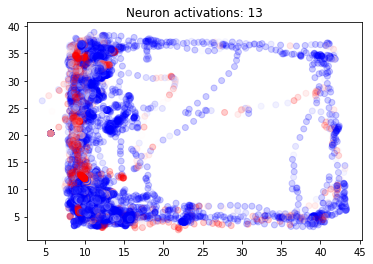

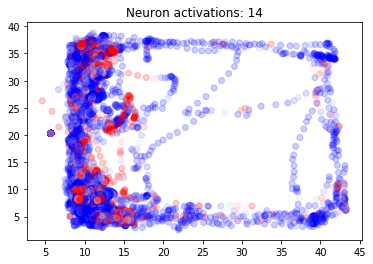

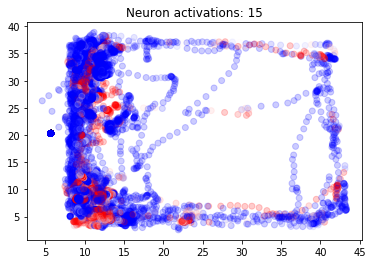

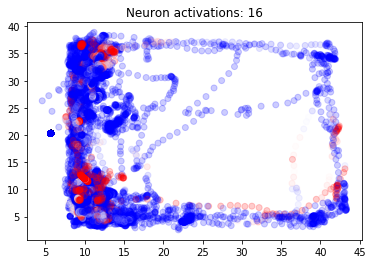

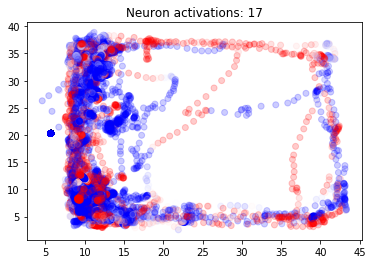

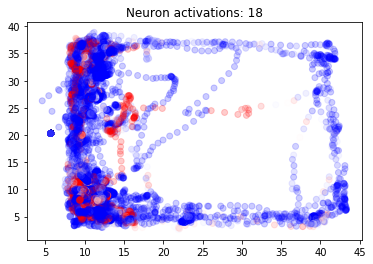

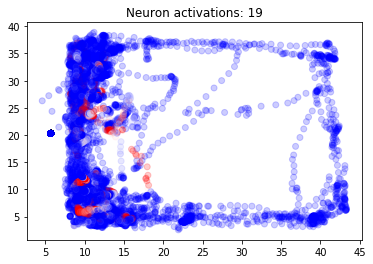

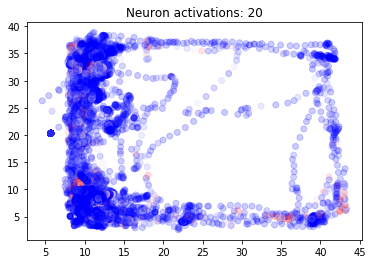

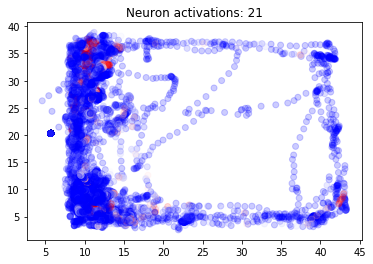

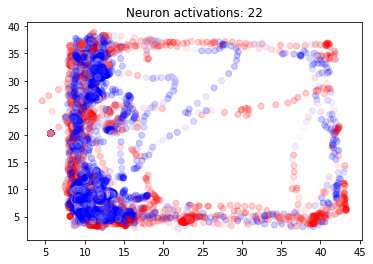

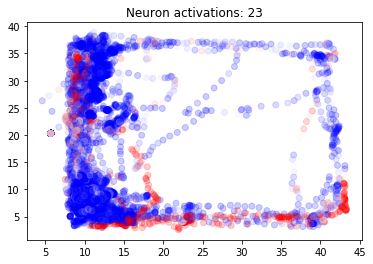

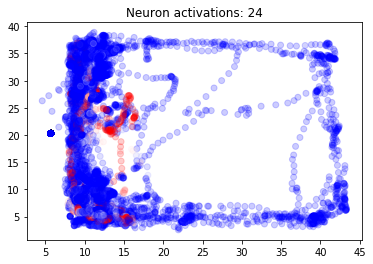

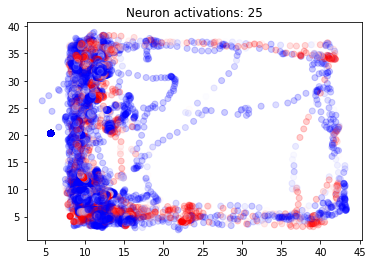

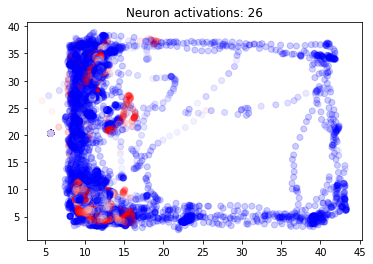

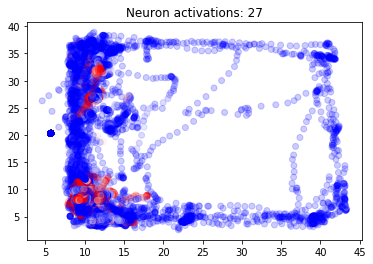

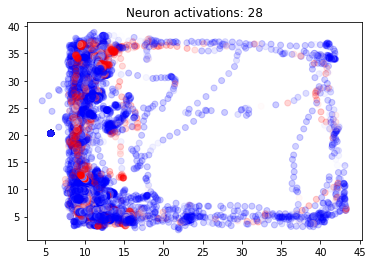

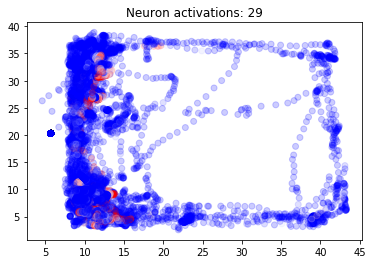

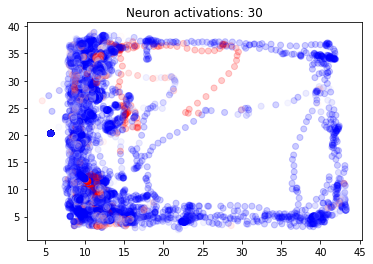

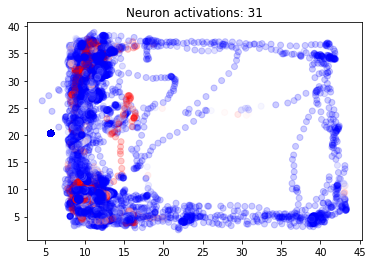

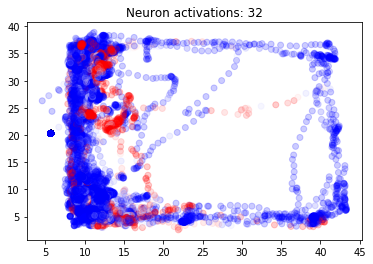

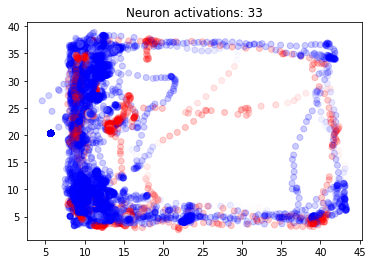

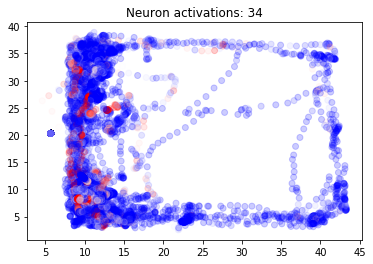

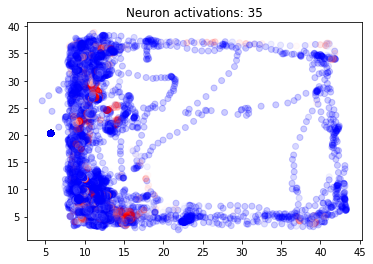

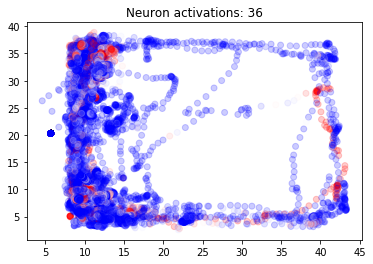

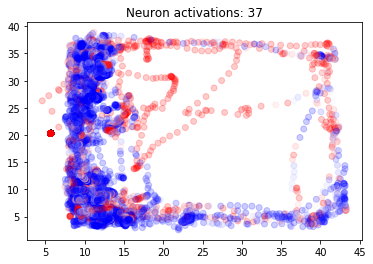

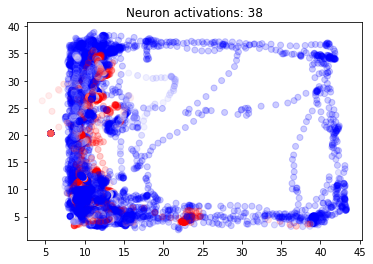

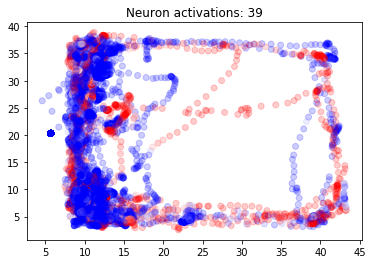

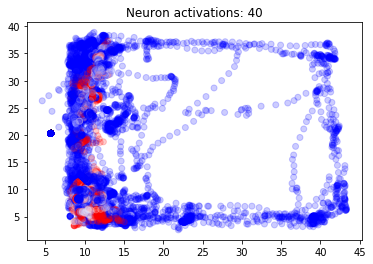

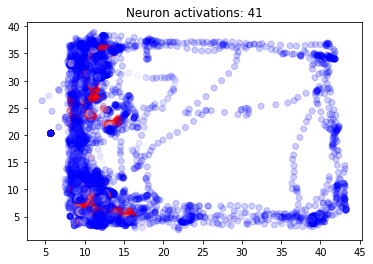

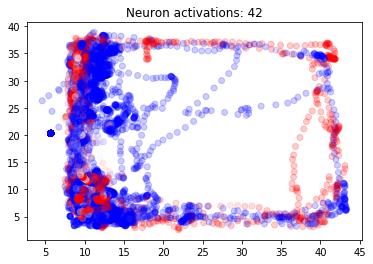

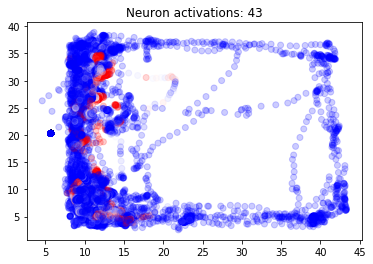

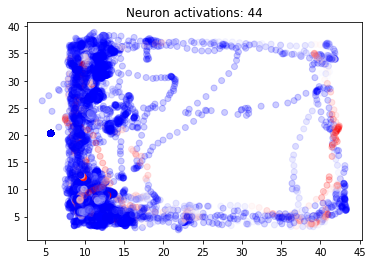

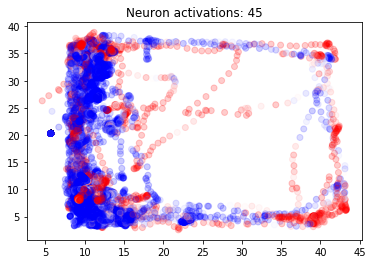

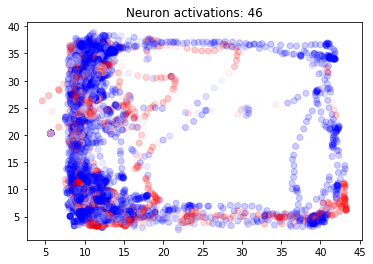

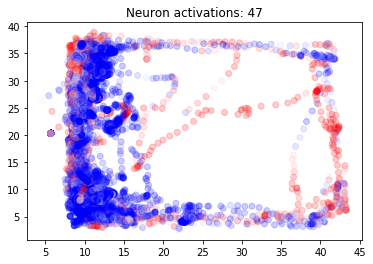

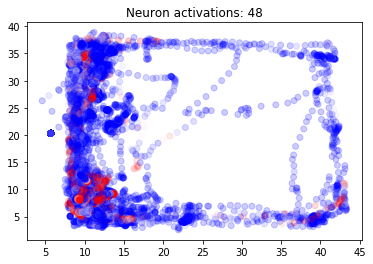

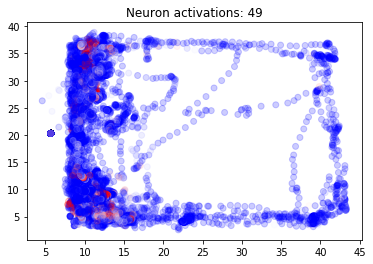

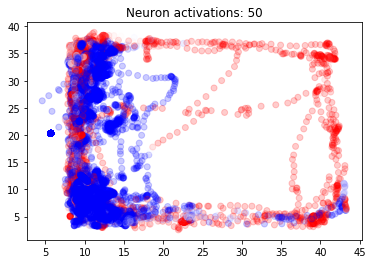

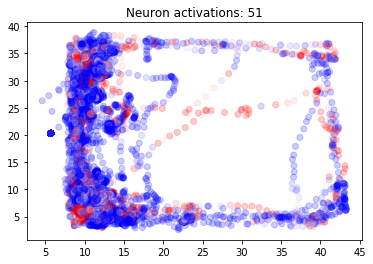

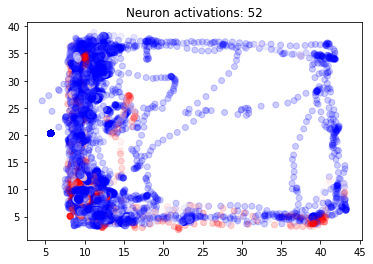

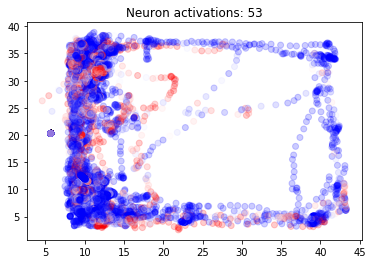

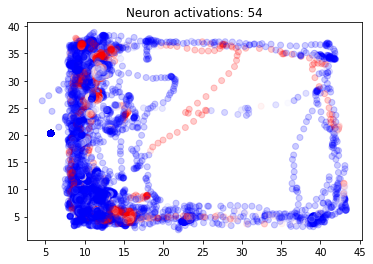

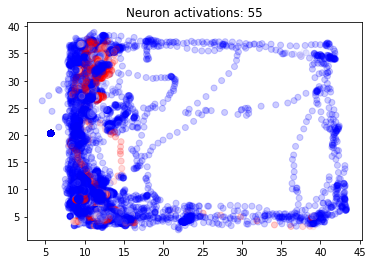

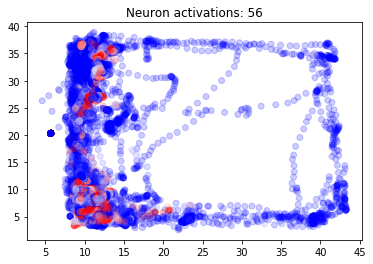

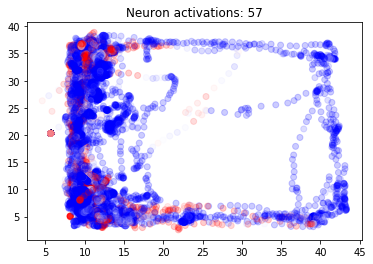

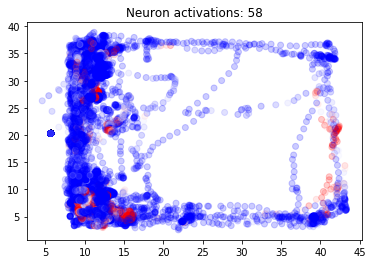

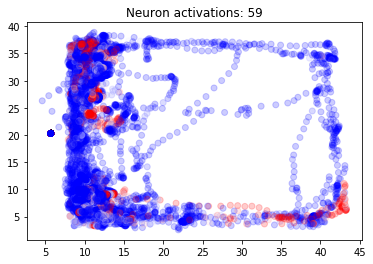

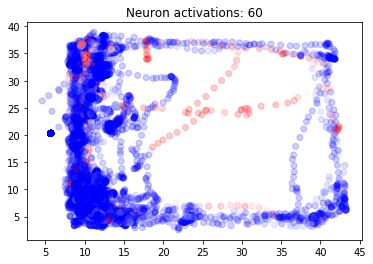

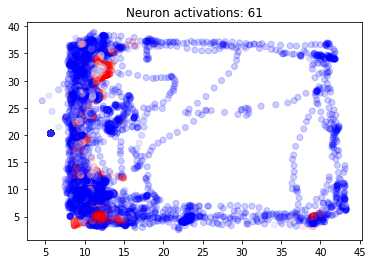

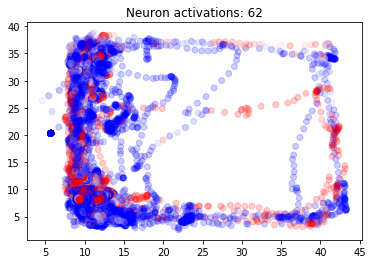

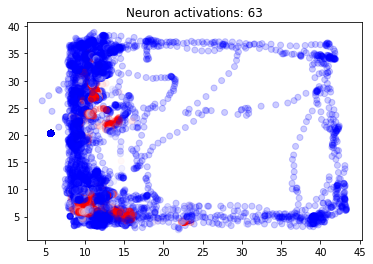

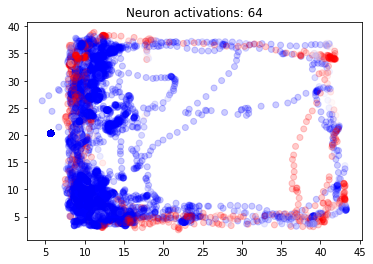

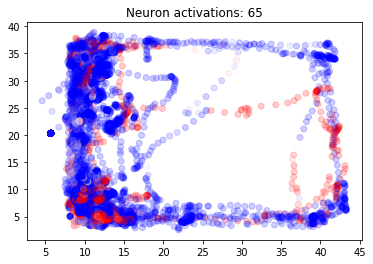

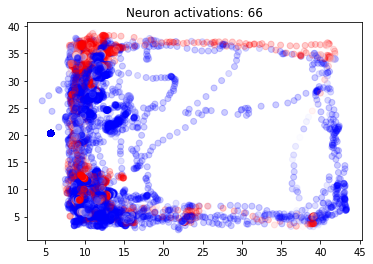

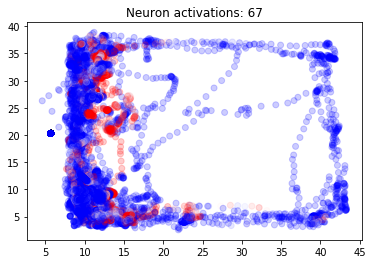

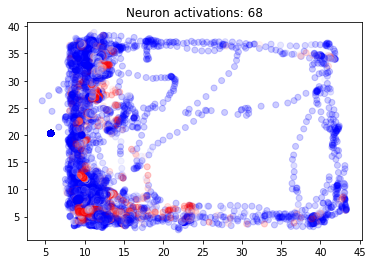

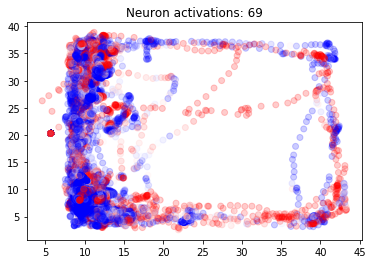

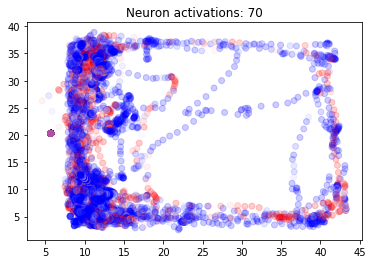

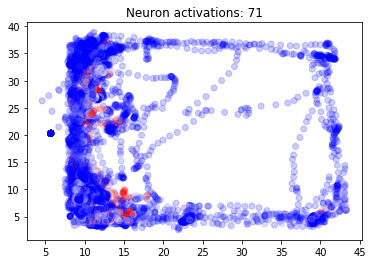

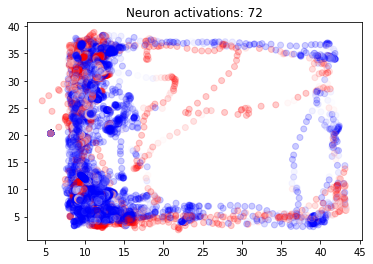

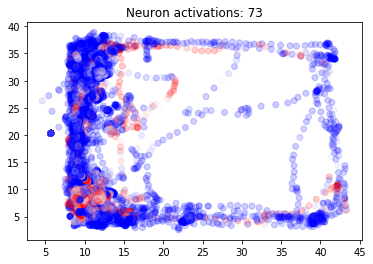

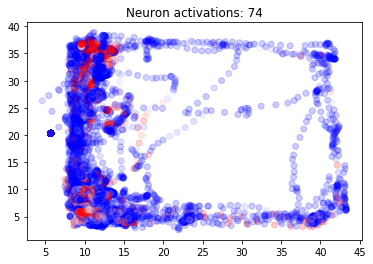

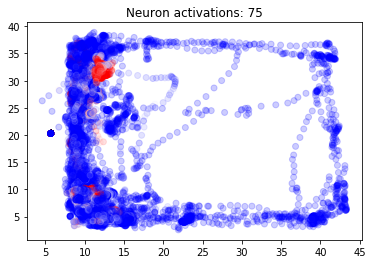

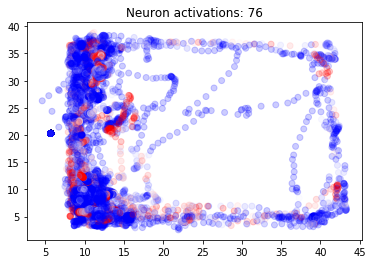

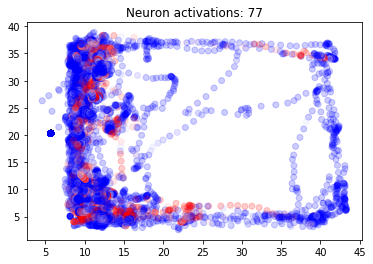

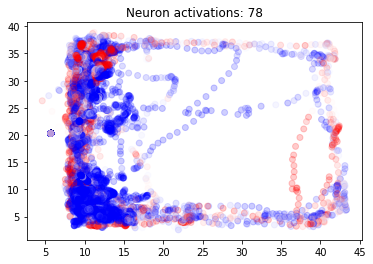

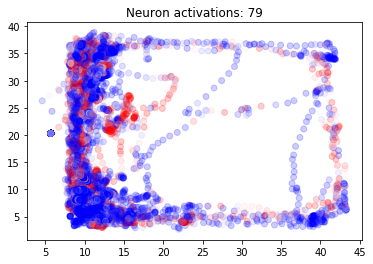

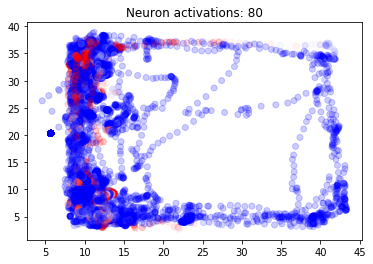

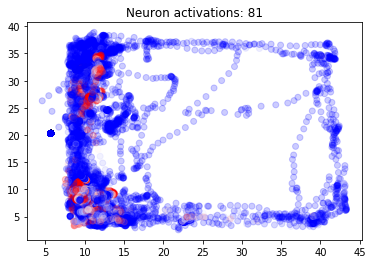

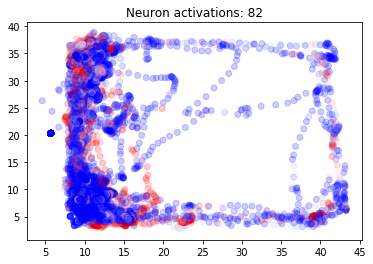

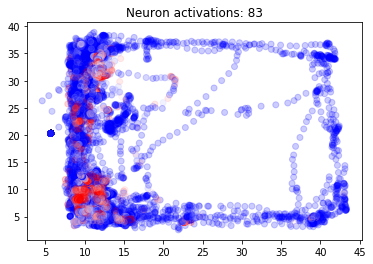

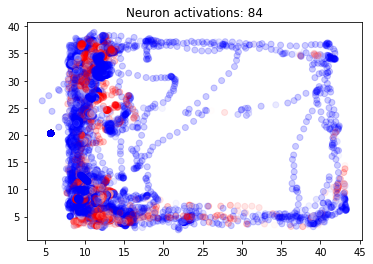

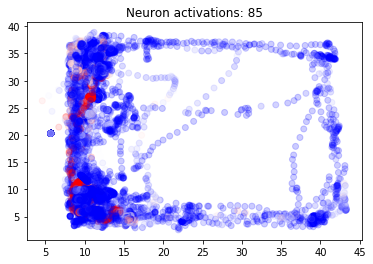

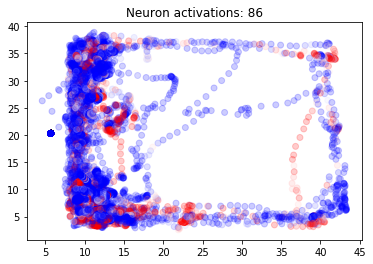

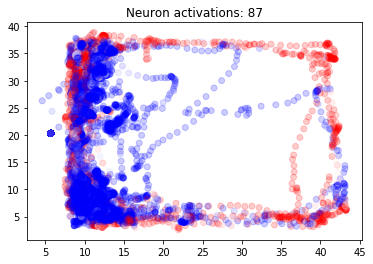

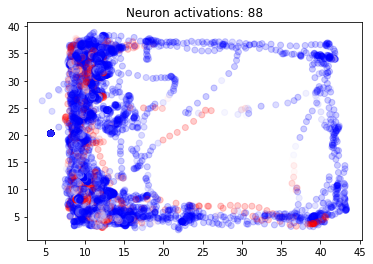

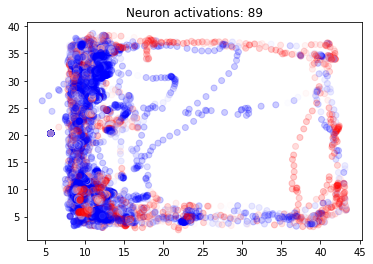

In [35]:
#All neurons colormap
for neuron in range(0,dat_mouse1.shape[1]):
    arr_color = cm.bwr(dat_mouse1[:,neuron])
    arr_color[:,3]=0.2
    plt.scatter(averaged_motion_mouse1[:,0],averaged_motion_mouse1[:,1],c=arr_color)
    plt.title('Neuron activations: '+str(neuron))
    plt.show()

# PCA activation maps

In [45]:
pca=PCA(n_components=10)
pcs=pca.fit_transform(dat_mouse1)
print(pcs.shape)

(13804, 10)


In [46]:
pca.explained_variance_ratio_

array([0.1108864 , 0.06904211, 0.05390425, 0.03991081, 0.03631193,
       0.03505041, 0.03233696, 0.02907327, 0.0273356 , 0.02482555])

In [47]:
np.sum(pca.explained_variance_ratio_)

0.4586772964075478

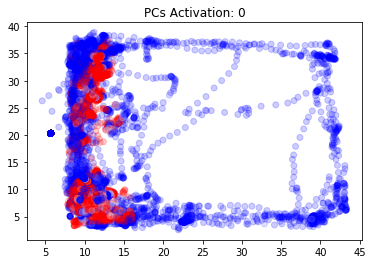

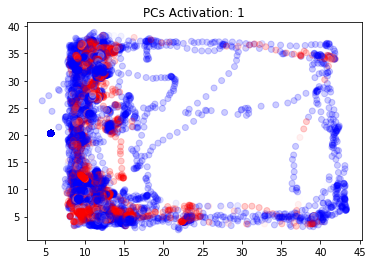

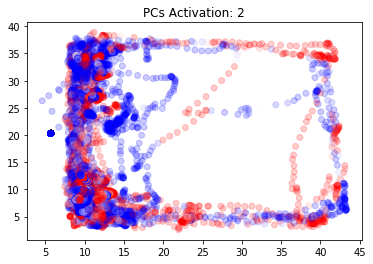

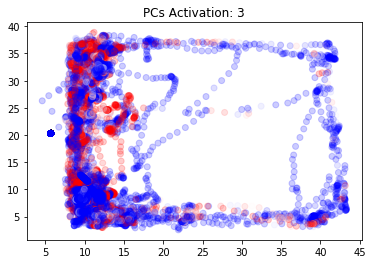

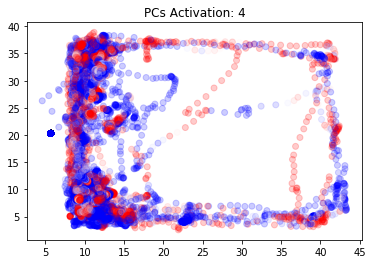

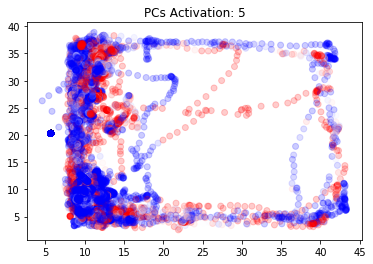

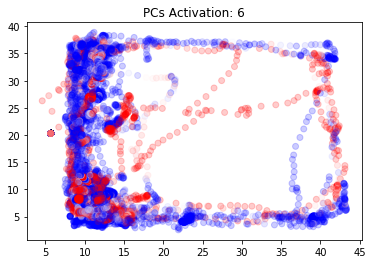

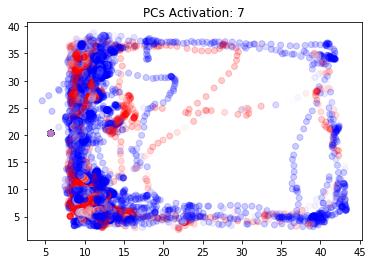

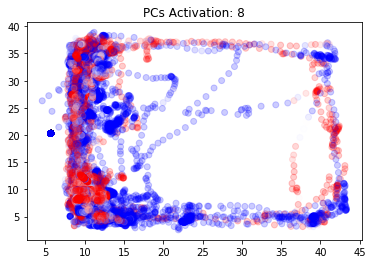

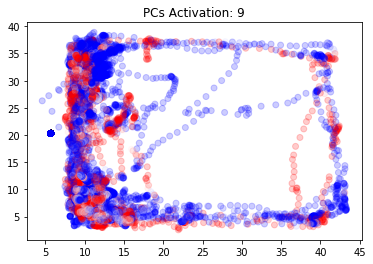

In [50]:
# All PC's colormap
for pc in range(0,pcs.shape[1]):
    arr_color = cm.bwr(pcs[:,pc])
    arr_color[:,3]=0.2
    plt.scatter(averaged_motion_mouse1[:,0],averaged_motion_mouse1[:,1],c=arr_color)
    plt.title('PCs Activation: '+str(pc))
    plt.show()

# K-Means Activations

In [53]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(dat_mouse1.T)
print(kmeans.cluster_centers_)

[[-0.0972646  -0.08779599 -0.15567934 ... -0.3958587  -0.38260867
  -0.35978973]
 [-0.28704224 -0.07677176  0.02332241 ...  0.30317267  0.33245194
   0.41921328]]


In [55]:
clusters=kmeans.cluster_centers_

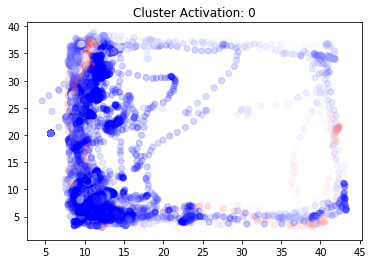

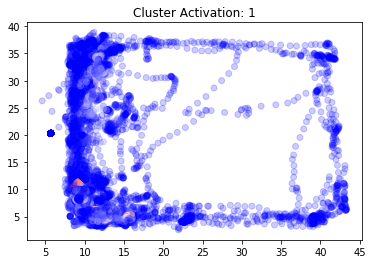

In [60]:
#Plot clusters
for cluster in range(0,clusters.shape[0]):
    arr_color = cm.bwr(clusters[cluster,:])
    arr_color[:,3]=0.2
    plt.scatter(averaged_motion_mouse1[:,0],averaged_motion_mouse1[:,1],c=arr_color)
    plt.title('Cluster Activation: '+str(cluster))
    plt.show()

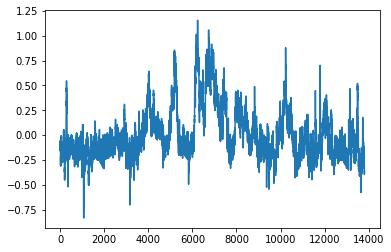

In [61]:
plt.plot(clusters[0,:])

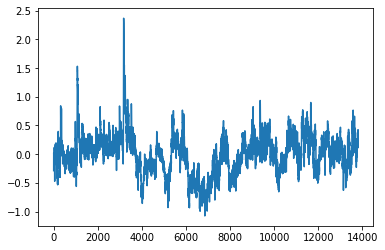

In [62]:
plt.plot(clusters[1,:])

In [63]:
print(np.corrcoef(clusters[0,:],clusters[1,:]))

[[ 1.         -0.80411555]
 [-0.80411555  1.        ]]
